
# Titanic Model Building Project
In this project, we will work with a dataset on the Titanic disaster. The dataset can be downloaded from here: https://www.kaggle.com/c/titanic/data?select=train.csv. Hundreds of people perished when the Titanic ship struck an iceberg, and we will explore what characteristics of a passenger might lead to their survival or death. We will build and evaluate a logistic regression model to predict if a passenger survived or perished.

The following notebook illustrates several techniques for working with data in Python. It goes through exploratory data analysis, prepping data for model building, and the model building/evaluation process. This notebook is not meant to be a comprehensive guide on the model building process. It is meant to provide guidelines on how to create notebooks and code several of the key steps of data exploration and the model building/evaluation process.

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import yellowbrick
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix

In [2]:
#check versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sklearn.__version__)
print('yellowbrick version:', yellowbrick.__version__)

pandas version: 1.1.5
numpy version: 1.19.5
scikit-learn version: 0.24.1
yellowbrick version: 1.3.post1


## Exploring the Data

In [3]:
#load the Titanic data into a dataframe
df_titanic = pd.read_csv('titanic_data.csv')
#display the first few rows of data
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#display the dimensions of the dataframe
df_titanic.shape

(891, 12)

### Observations

$\bullet$ The dataset has $891$ rows and $12$ columns <br>
$\bullet$ Some of the columns will not be useful for model building, e.g., 'Name', 'Ticket', and 'Cabin' <br>
$\bullet$ There is a mix of numerical and categorical data <br>
$\bullet$ The target of the model will be 'Survived': $0$ means survived; $1$ means perished

In [5]:
#look at the column data types
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#get summary statistics of the numerical data
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#get summary statistics of the non-numerical data
df_titanic.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Karaic, Mr. Milan",male,CA. 2343,G6,S
freq,1,577,7,4,644


### Observations

$\bullet$ There is some missing data to deal with <br>
$\bullet$ A large majority of the 'Cabin' data is missing

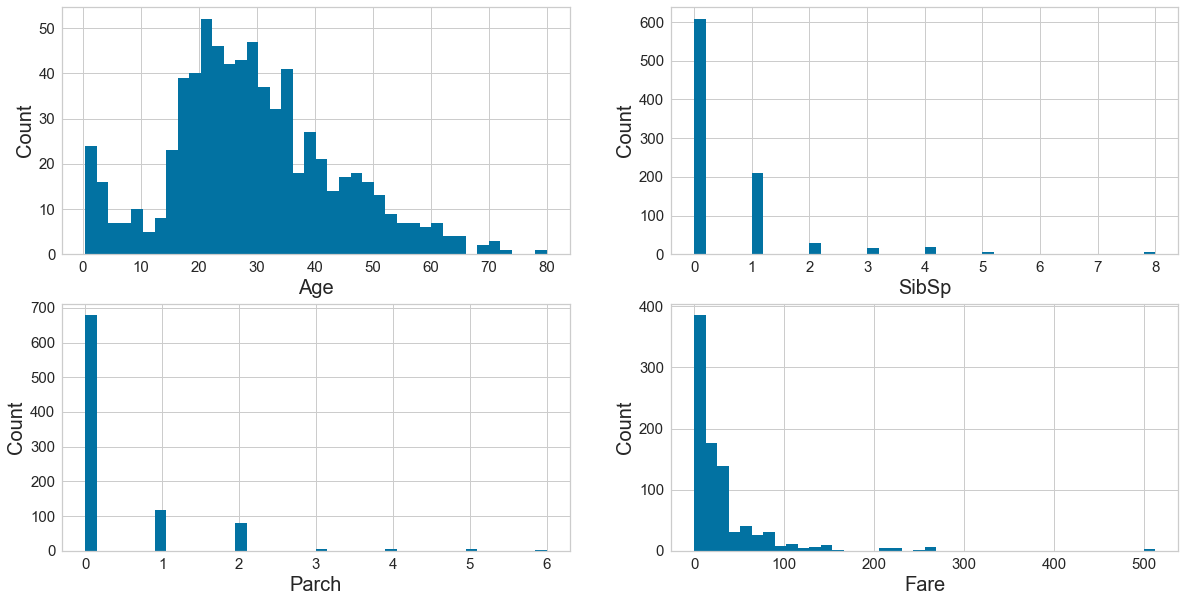

In [8]:
#get histograms of the numerical features
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_titanic[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

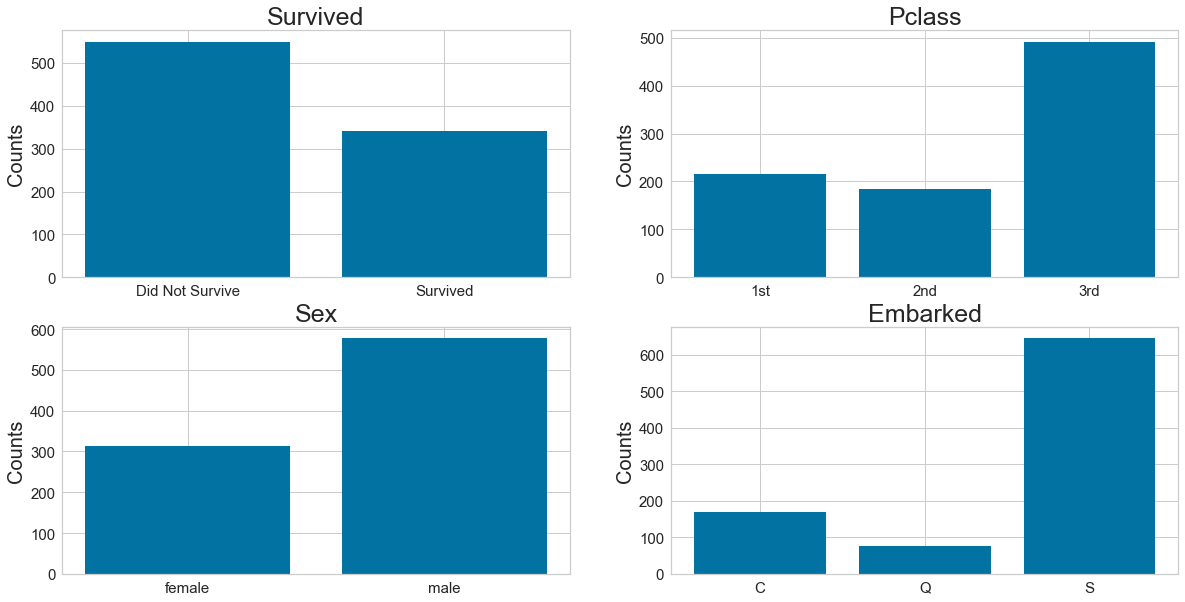

In [9]:
#create bar charts of some of the categorical features


#create a copy of the data frame for use with graphing
df_plots = df_titanic.copy()
df_plots = df_titanic.replace({'Survived': {1: 'Survived', 0: 'Did Not Survive'}})
df_plots = df_plots.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Survived = df_plots.groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = df_plots.groupby('Survived').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Pclass = df_plots.groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = df_plots.groupby('Pclass').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = df_plots.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = df_plots.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Embarked = df_plots.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = df_plots.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()

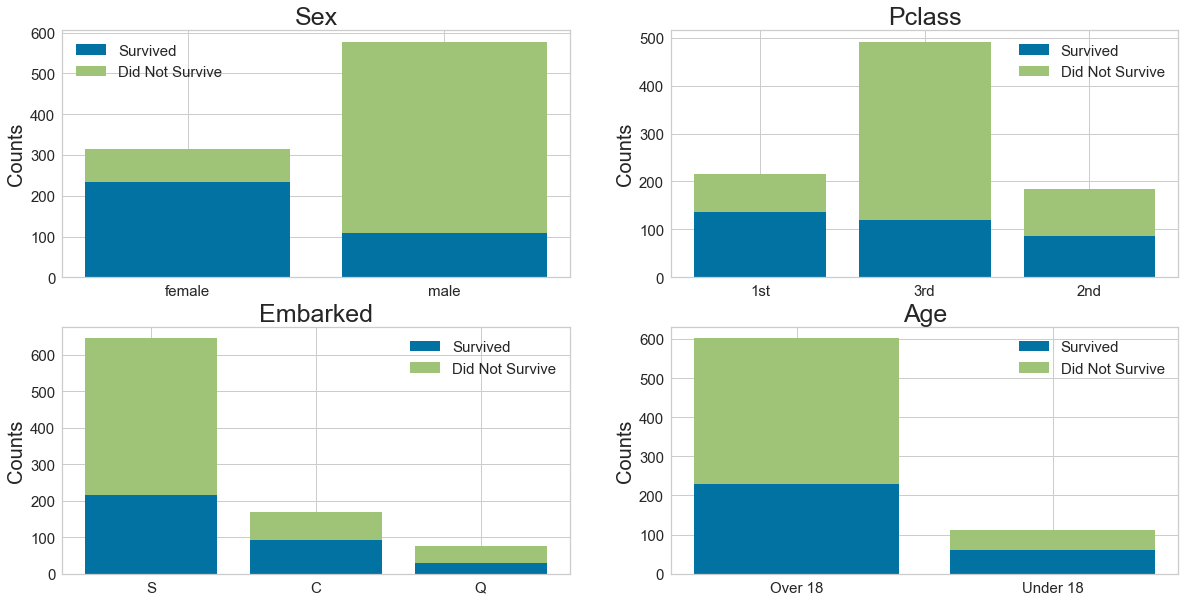

In [10]:
#stacked bar charts to compare survived/not survived

#create a function to define age category
def check_adult(age):
    if np.isnan(age):
        return np.nan
    elif age >= 18:
        return 'Over 18'
    else:
        return 'Under 18'   
df_plots['Age_category'] = df_plots['Age'].apply(check_adult)

#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_survived = df_plots[df_titanic['Survived']==1]['Sex'].value_counts()
Sex_not_survived = df_plots[df_titanic['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Did Not Survive'), fontsize = 15)

# make the data read to feed into the visualizer
Pclass_survived = df_plots[df_titanic['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = df_plots[df_titanic['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Did Not Survive'), fontsize = 15)

# make the data read to feed into the visualizer
Embarked_survived = df_plots[df_titanic['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = df_plots[df_titanic['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Did Not Survive'), fontsize = 15)

# make the data read to feed into the visualizer
Age_survived = df_plots[df_titanic['Survived']==1]['Age_category'].value_counts()
Age_not_survived = df_plots[df_titanic['Survived']==0]['Age_category'].value_counts()
#Age_not_survived = Age_not_survived.reindex(index = Age_survived.index)
# make the bar plot
p7 = axes[1, 1].bar(Age_survived.index, Age_survived.values)
p8 = axes[1, 1].bar(Age_not_survived.index, Age_not_survived.values, bottom=Age_survived.values)
axes[1, 1].set_title('Age', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('Survived', 'Did Not Survive'), fontsize = 15)
plt.show()

### Observations

$\bullet$ Most passengers on the Titanic did not survive <br>
$\bullet$ Most passengers were passenger third class<br>
$\bullet$ Most passengers embarked from Southampton <br>
$\bullet$ Gender and passenger class appear to be a significant factor in predicting survival <br>
$\bullet$ Age also appears to play a role in predicting survival <br>
$\bullet$ The fare data is right-skewed; this can be adjusted by taking the logarithm

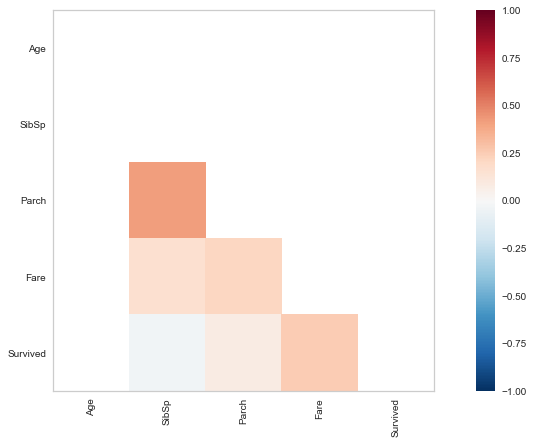

In [11]:
#create a heat map of the Pearson correlation coefficients of the numerical features
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

heat_map_features = num_features.copy()
#add 'Survived' to the heat map features
heat_map_features.append('Survived')
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df_titanic[heat_map_features].values

# instantiate the visualizer 
heat_map = Rank2D(features=heat_map_features, algorithm='pearson')
heat_map.fit_transform(X) #fit and tranform the data for the heat map
plt.show()          

### Observations

$\bullet$ The numerical feature most highly correlated with 'Survived' is 'Fare' <br>
$\bullet$ There is not significant collinearity between the features

## Preparing the Data for Modeling

In [12]:
#split the data into a training and test set
#we do this before making any modifications to the data to prevent data snooping
#drop the columns PassengerId, Name, Ticket, and Cabin as they are not useful for model building
#drop Survived from the features as it is the target
X = df_titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
#get the target
y = df_titanic['Survived']
#split the data into training and test sets
#split the data into training and test sets (80% Training/20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#reset indices in the training and test sets to prevent pandas slicing warnings
X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [13]:
#show the sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)
#see how many survived and deaths are in training and test sets
print(y_train.value_counts())
print(y_test.value_counts())

(712, 7)
(179, 7)
0    441
1    271
Name: Survived, dtype: int64
0    108
1     71
Name: Survived, dtype: int64


In [14]:
#look for missing data in the training and test sets
print(X_train.isna().sum())
print(X_test.isna().sum())

Pclass        0
Sex           0
Age         139
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         38
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64


In [15]:
#fill the missing missing ages in the training and test sets with the median training age
#this is done to prevent any data snooping from the test set
med_age_train = X_train['Age'].median()
#fill in the median training age to the training set
X_train['Age'].fillna(med_age_train, inplace = True)
#fill in the median training age to the test set
X_test['Age'].fillna(med_age_train, inplace = True)

In [16]:
#fill in missing emparked values with most common value (mode)
mode_embarked_train = X_train['Embarked'].mode()[0]
X_train['Embarked'].fillna(mode_embarked_train, inplace = True)
#fill in the median training age to the test set
X_test['Embarked'].fillna(mode_embarked_train, inplace = True)

In [17]:
#verify there is no more missing data
print(X_train.isna().sum())
print(X_test.isna().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [18]:
#create a column for the log of the fares to reduce skew
#this is not totally necessary, but it is good to know how to log-transform variables
X_train['log_fare'] = np.log1p(X_train['Fare'])
X_test['log_fare'] = np.log1p(X_test['Fare'])

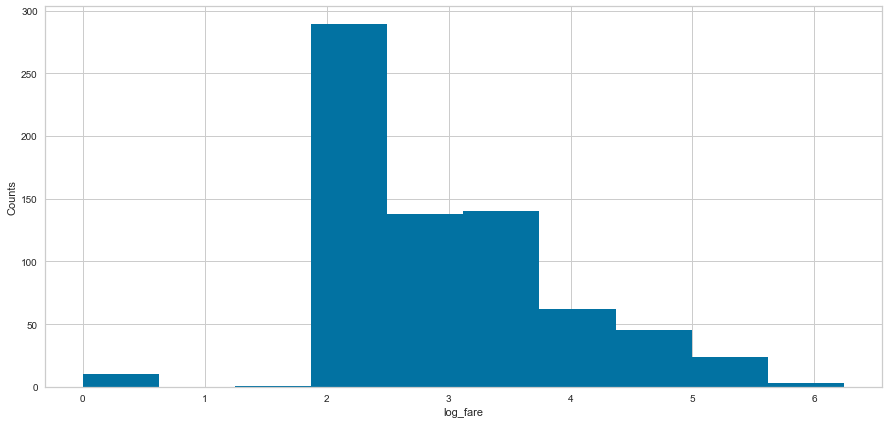

In [19]:
#look at a histogram of log_fare
X_train['log_fare'].hist()
plt.xlabel('log_fare')
plt.ylabel('Counts')
plt.show()

In [20]:
#create a new dataframe without Fare column
X_train.drop('Fare', axis = 1, inplace = True)
X_test.drop('Fare', axis = 1, inplace = True)

In [21]:
#create dummy variables for the categorical columns 
X_train = X_train.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
X_test = X_test.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
#get dummy variables for the categorical columns dropping the first dummy variable
#we drop the first dummy variable, so we get one fewer than the number of categories
#this prevents collinearity between the dummy variables
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [22]:
#check dimensions of the training and test feature matrices
print(X_train.shape)
print(X_test.shape)
#view the training features
X_train.head()

(712, 9)
(179, 9)


,Age,SibSp,Parch,log_fare,Pclass_2nd,Pclass_3rd,Sex_male,Embarked_Q,Embarked_S
0,28.0,3,1,3.275887,0,1,1,0,1
1,18.0,0,2,4.390119,0,0,0,0,1
2,42.0,0,0,2.639057,1,0,1,0,1
3,32.0,0,0,4.051712,0,1,1,0,1
4,50.0,1,0,4.676793,0,0,1,0,0


### Summary of Data Preparation Steps

$\bullet$ Dropped unnecessary data <br>
$\bullet$ Filled in missing data <br>
$\bullet$ Replaced fare price with its log; verified the data is more "normal" <br>
$\bullet$ Created dummy variables for the categorical data <br>
$\bullet$ Split data into training and test sets

# Train and Evaluate the Model

In [23]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression

#import evaluation tools
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [24]:
#instantiate the logistic regression model 
logreg_model = LogisticRegression(max_iter = 500)
#fit the model to the training set
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Model Accuracy: 76.54%


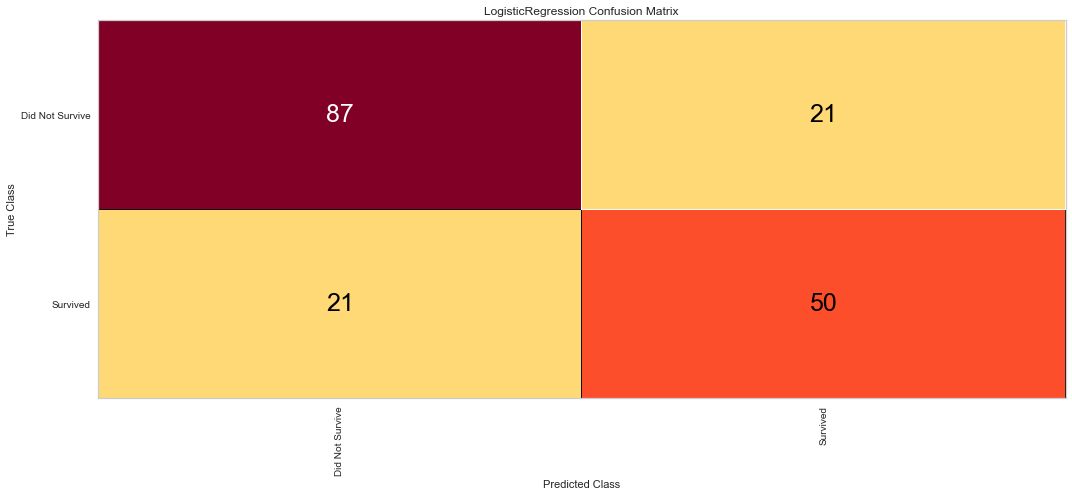

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [25]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['Did Not Survive','Survived']
label_encoder = {0: 'Did Not Survive', 1: 'Survived'}

#initialize the confusion matrix
cm = ConfusionMatrix(logreg_model, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

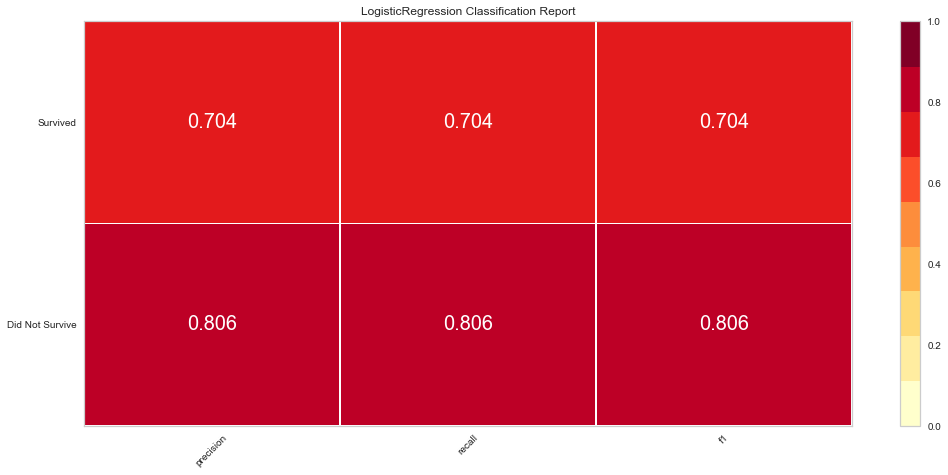

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [26]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(logreg_model, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(X_train, y_test)  
#evaluate the model on the test data
class_report.score(X_test, y_test)  
class_report.show()

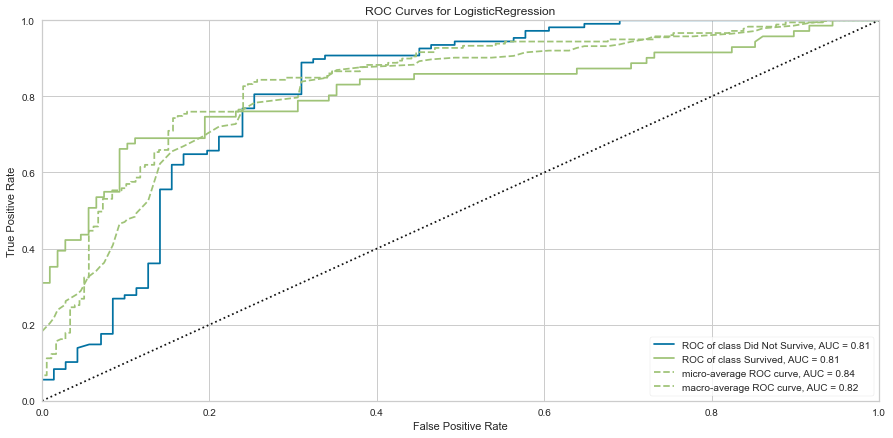

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [27]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(logreg_model, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(X_test, y_test)
#evaluate the model on the test data
roc_curve.score(X_test, y_test)  
roc_curve.show()

### Conclusions

$\bullet$ Passenger class and gender play an important role in predicting if a Titanic passenger survived <br>
$\bullet$ Logistic Regression model predicts survival with approximately $80\%$ accuracy <br>
$\bullet$ Classification report and ROC curve all suggest the model has strong predictive power <br>
$\bullet$ Gender, passenger class, fare, and age are useful in predicting survival